In [2]:
import pandas as pd

In [7]:
titanic_df = pd.read_csv('./data/titanic.csv')

In [14]:
type(titanic_df)

pandas.core.frame.DataFrame

In [22]:
titanic_df.head(5)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [20]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 112.9+ KB


### How many survived and how many didn't?

In [32]:
titanic_df.survived.value_counts(normalize = True) * 100

0    65.803503
1    34.196497
Name: survived, dtype: float64

In [33]:
titanic_df["survived"].value_counts()

0    864
1    449
Name: survived, dtype: int64

### People of what age on board titanic ship

In [35]:
import matplotlib.pyplot as plt

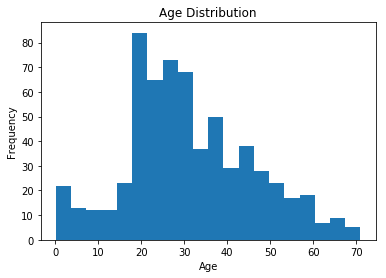

In [39]:
plt.hist(titanic_df.age, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age.png')

### survived vs sex

In [41]:
pd.crosstab(titanic_df.survived, titanic_df.sex, margins = True)

sex,female,male,All
survived,,,
0,156,708,864
1,307,142,449
All,463,850,1313


### How many childern were on board?


In [42]:
titanic_df.shape

(1313, 11)

In [43]:
children_df= titanic_df[titanic_df.age < 10]

In [44]:
children_df.shape

(46, 11)

### Bias over class while survival

In [48]:
pd.crosstab(titanic_df.survived , titanic_df.pclass, margins = True)

pclass,1st,2nd,3rd,All
survived,,,,
0,129,161,574,864
1,193,119,137,449
All,322,280,711,1313


In [51]:
pd.crosstab(titanic_df.survived , titanic_df.pclass, normalize='index') 

pclass,1st,2nd,3rd
survived,,,
0,0.149306,0.186343,0.664352
1,0.429844,0.265033,0.305122


In [52]:
pd.crosstab(titanic_df.survived , titanic_df.sex, normalize='index') 

sex,female,male
survived,,
0,0.180556,0.819444
1,0.683742,0.316258


In [54]:
pd.crosstab(titanic_df.survived , titanic_df.pclass, normalize='columns') 

pclass,1st,2nd,3rd
survived,,,
0,0.400621,0.575,0.807314
1,0.599379,0.425,0.192686


### Avg age of each pclass

In [59]:
titanic_df.groupby('pclass')['age'].mean()

pclass
1st    39.667773
2nd    28.300314
3rd    24.519658
Name: age, dtype: float64

In [63]:
titanic_df['gender'] = titanic_df['sex'].map(lambda s: int(s == 'male'))

In [66]:
titanic_df.sample(5, random_state = 10)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,gender
271,272,1st,1,"Warren, Mrs Frank Manley (Anna S. Atkinson)",60.0,Cherbourg,"Portland, OR",NaN,NaN,5,female,0
375,376,2nd,1,"Collyer, Mrs Harvey (Charlotte Tate)",31.0,Southampton,"Bishopstoke, Hants / Fayette Valley, ID",NaN,NaN,14,female,0
800,801,3rd,0,"Flynn, Mr James",NaN,Queenstown,NaN,NaN,NaN,NaN,male,1
145,146,1st,1,"Homer, Mr Harry",35.0,Cherbourg,"Indianapolis, IN",NaN,NaN,15,male,1
1277,1278,3rd,0,"Van Impe, Mr Jean Baptiste",NaN,NaN,NaN,NaN,NaN,NaN,male,1
